Importing all the necessary libraries.

In [62]:
import pandas as pd
import numpy as np

import seaborn as sns

In [63]:
#!wget https://www.kaggle.com/datasets/camnugent/california-housing-prices?select=housing.csv

Reading the data

In [64]:
df_data = pd.read_csv("california-housing-prices.csv")

To have a look

In [65]:
df_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Checking the missing values

In [66]:
df_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Plotting histogram of the column of interest

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

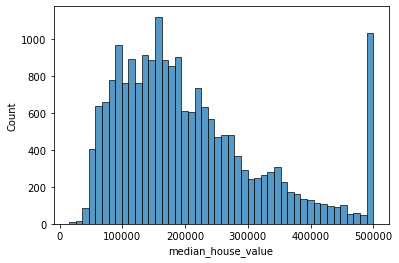

In [67]:
sns.histplot(df_data['median_house_value'])

Choosing the columns we need for the training

In [68]:

df_data = df_data[['longitude', 
'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']]

Printing median of the population

In [69]:
print(f"Median of the population: {df_data['population'].median()}")

Median of the population: 1166.0


Now we have to spliit original data in to the following tables: \\

val <- these values are compared values generated by the model after "consuming" test data, so difference shows how well model performs! \\

test <- these are data, which model hasn't seen, we will apply and generate values. \\

train <- this is used for training for our model \\


we also need to shuffle the data, in the order to more even distribution and random statistics...

In [70]:
n = df_data.shape[0]

n_val = int(0.2 * n)
n_test =  int(0.2 * n)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

Here happens the data split

we also reset index, not to have random indexes

In [71]:
df_train =  df_data.iloc[idx[n_train:]]
df_val =  df_data.iloc[idx[n_train:n_train + n_val]]
df_test =  df_data.iloc[idx[n_train + n_val:]]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

Applying log1p transformation for target values, no idea yet why

In [72]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)



https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

deleting column from dataframe, in place, so it is not neccesary to reassign

In [73]:
df_train.drop('median_house_value', axis=1, inplace=True)
df_test.drop('median_house_value', axis=1, inplace=True)
df_val.drop('median_house_value', axis=1, inplace=True)

In [74]:
df_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -120.85     37.51                15.0       1131.0           285.0   
1    -118.25     34.09                52.0       1866.0           470.0   
2    -122.02     37.31                34.0       2629.0           433.0   
3    -121.88     37.30                16.0       2692.0           749.0   
4    -122.27     37.56                17.0       3211.0           847.0   

   population  households  median_income  
0       728.0       281.0         1.5531  
1      1211.0       417.0         2.9350  
2      1301.0       431.0         6.0830  
3      1674.0       681.0         2.6763  
4      1553.0       812.0         4.9434

In [75]:
df_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [76]:
df_test.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [77]:
df_val.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64